# Data Cleaning

In [4]:

pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 13.6 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 12.7 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tensorflow-macos

ERROR: Could not find a version that satisfies the requirement tensorflow-macos (from versions: none)

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: pip3 install --upgrade pip
ERROR: No matching distribution found for tensorflow-macos
Note: you may need to restart the kernel to use updated packages.


## Data Cleaning


In [17]:
import pandas as pd

# Load the dataset 
file_path = 'SData_Oct2006.csv'
df = pd.read_csv(file_path, header=1)

# Check and report initial shape
initial_shape = df.shape

# Remove Duplicate Records
duplicates_count = df.duplicated().sum()
df.drop_duplicates(inplace=True)
print(f"🧾 Duplicate rows removed: {duplicates_count}")

#  Handle Missing Values
# Report missing values per column
print("\n🔍 Missing values per column (before handling):")
print(df.isnull().sum().sort_values(ascending=False))

# Drop rows that are completely empty
df.dropna(how='all', inplace=True)

# Fill missing values: strings → 'unknown', numbers → 0
for col in df.columns:
    if df[col].dtype == 'object':
        df[col].fillna('unknown', inplace=True)
    else:
        df[col].fillna(0, inplace=True)

# Fix Data Types
# Convert 'Date' column to datetime if it exists
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Standardize Formats
# Clean 'City' column if it exists
if 'City' in df.columns:
    df['City'] = df['City'].str.lower().str.strip()

# Correct Structural Errors
# Fix inconsistent values in 'City' column
if 'City' in df.columns:
    df['City'] = df['City'].replace({'melb': 'melbourne', 'Melb': 'melbourne'})

# Filter Outliers 
if 'Price' in df.columns:
    Q1 = df['Price'].quantile(0.25)
    Q3 = df['Price'].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df['Price'] >= Q1 - 1.5 * IQR) & (df['Price'] <= Q3 + 1.5 * IQR)]

# Validate Data Consistency
# Ensure no future dates in 'Date' column
if 'Date' in df.columns:
    df = df[df['Date'] <= pd.Timestamp.today()]

#  Rename Columns for readability
df.rename(columns=lambda x: x.strip().lower().replace(' ', '_'), inplace=True)

# Save Cleaned Dataset
df.to_csv('cleaned_SData_Oct2006.csv', index=False)

# Report final shape and changes
final_shape = df.shape
print(f"\n✅ Data cleaning complete.")
print(f"📊 Initial shape: {initial_shape}, Final shape: {final_shape}")
print(f"💾 Cleaned file saved as 'cleaned_SData_Oct2006.csv'")


🧾 Duplicate rows removed: 0

🔍 Missing values per column (before handling):
Unnamed: 108    4192
Unnamed: 107    4192
Unnamed: 106    4192
V58                0
V69                0
                ... 
V23                0
V22                0
V21                0
V20                0
V44                0
Length: 109, dtype: int64

✅ Data cleaning complete.
📊 Initial shape: (4192, 109), Final shape: (4192, 109)
💾 Cleaned file saved as 'cleaned_SData_Oct2006.csv'


/var/folders/lk/k1tkj48n66n798z1rjbtc8jm0000gn/T/ipykernel_17822/1693461658.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(0, inplace=True)
/var/folders/lk/k1tkj48n66n798z1rjbtc8jm0000gn/T/ipykernel_17822/1693461658.py:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

In [4]:
pip install torch torchvision


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 MB 43.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 49.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.2/536.2 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 25.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11/11 [torchvision] [torchvision]
Note: you may need to restart the kernel to use updated packages.


## LSTM Code Block

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

df = pd.read_csv("cleaned_SData_Oct2006.csv")
site_df = df[df['scats_number'] == 970]
volume_cols = [col for col in df.columns if col.startswith('v') and col[1:].isdigit()]
series = site_df[volume_cols].values.flatten().reshape(-1, 1)

scaler = MinMaxScaler()
scaled = scaler.fit_transform(series)

#  Create sequences 
def create_sequences(data, seq_len):
    X, y = [], []
    for i in range(len(data) - seq_len):
        X.append(data[i:i+seq_len])
        y.append(data[i+seq_len])
    return np.array(X), np.array(y)

SEQ_LEN = 24
X, y = create_sequences(scaled, SEQ_LEN)

X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32)

dataset = TensorDataset(X_tensor, y_tensor)
loader = DataLoader(dataset, batch_size=32, shuffle=True)

#  Define the LSTM model
class TrafficLSTM(nn.Module):
    def __init__(self, input_size=1, hidden_size=64, num_layers=1):
        super(TrafficLSTM, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # use last timestep
        return out

model = TrafficLSTM()
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training Loop
EPOCHS = 10
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for xb, yb in loader:
        optimizer.zero_grad()
        pred = model(xb)
        loss = criterion(pred, yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {total_loss/len(loader):.4f}")


Epoch 1/10, Loss: 0.0128
Epoch 2/10, Loss: 0.0033
Epoch 3/10, Loss: 0.0031
Epoch 4/10, Loss: 0.0029
Epoch 5/10, Loss: 0.0029
Epoch 6/10, Loss: 0.0028
Epoch 7/10, Loss: 0.0028
Epoch 8/10, Loss: 0.0028
Epoch 9/10, Loss: 0.0028
Epoch 10/10, Loss: 0.0028


## Saving trained model


In [6]:
# Save model weights
torch.save(model.state_dict(), "lstm_model.pth")




## Predict Future Values

In [12]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Split last 500 for testing
test_size = 500
X_test = X_tensor[-test_size:]
y_test = y_tensor[-test_size:]

# Predict using model
model.eval()
with torch.no_grad():
    predictions = model(X_test).numpy()
    actuals = y_test.numpy()

# Inverse scale
predicted_actual = scaler.inverse_transform(predictions)
y_actual = scaler.inverse_transform(actuals)




## Plot Graph + Calculate RMSE

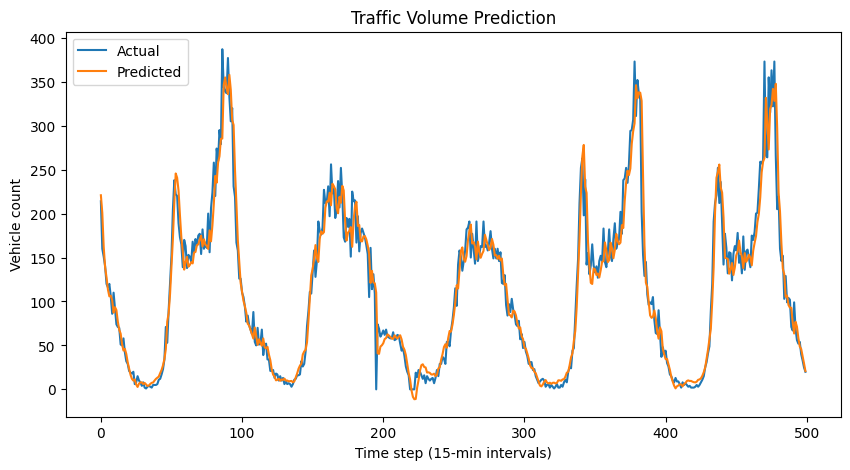

RMSE: 22.87


In [11]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Plot predictions vs actual
plt.figure(figsize=(10,5))
plt.plot(y_actual, label='Actual')
plt.plot(predicted_actual, label='Predicted')
plt.title("Traffic Volume Prediction")
plt.xlabel("Time step (15-min intervals)")
plt.ylabel("Vehicle count")
plt.legend()
plt.show()

# Calculate RMSE 
mse = mean_squared_error(y_actual, predicted_actual)
rmse = np.sqrt(mse)
print(f"RMSE: {rmse:.2f}")